About the Dataset

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')
print(df)

       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff 

In [17]:
type(df)
df.shape

(5172, 3001)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.dtypes

,0
Email No.,object
the,int64
to,int64
ect,int64
and,int64
...,...
military,int64
allowing,int64
ff,int64
dry,int64


In [6]:
# To identify null values
df.isnull().sum().sum()

0

In [7]:
# Checking for duplicate records.
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [9]:
df.drop('Email No.', axis = 1, inplace= True)

In [10]:
# Count the number of occurrences of each value in the 'Prediction' column
df['Prediction'].value_counts()

,count
Prediction,
0,3672
1,1500


<ipython-input-15-8a745680b148>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Prediction',


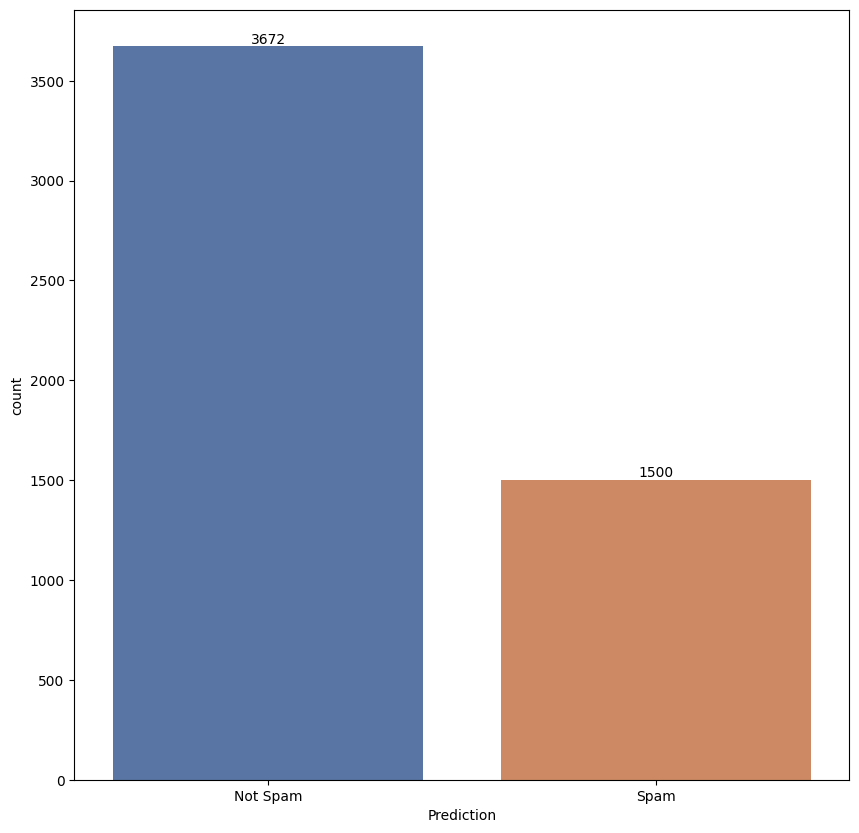

In [15]:
# Create a new figure with a specified size
plt.figure(figsize=(10, 10))

# Create a count plot using Seaborn to show the count of occurrences for each category in the 'Prediction' column
ax = sns.countplot(x = 'Prediction',
            data = df, palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks([0,1],['Not Spam','Spam'])

# Display the plot
plt.show()

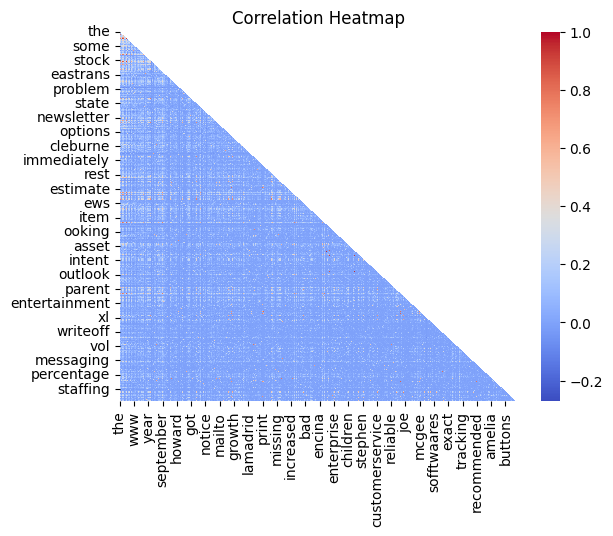

In [16]:
# Calculate the correlation matrix for the numeric columns in the dataset.
correlation_matrix = df.corr()

# Build a matrix of booleans (True, False) with the same shape as the data
ones_corr = np.ones_like(correlation_matrix, dtype=bool)

# The variable mask now contains the upper triangular matrix mask created in the previous step
mask = np.triu(ones_corr)

# Create a heatmap to visualize the correlation matrix.
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap="coolwarm")

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Prepare the features and target
X = df.iloc[:, :3000]
y = df.iloc[:, -1]

In [24]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()
label_encoder.fit(y)

LabelEncoder()

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the decision tree
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
# Calculate and print the accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


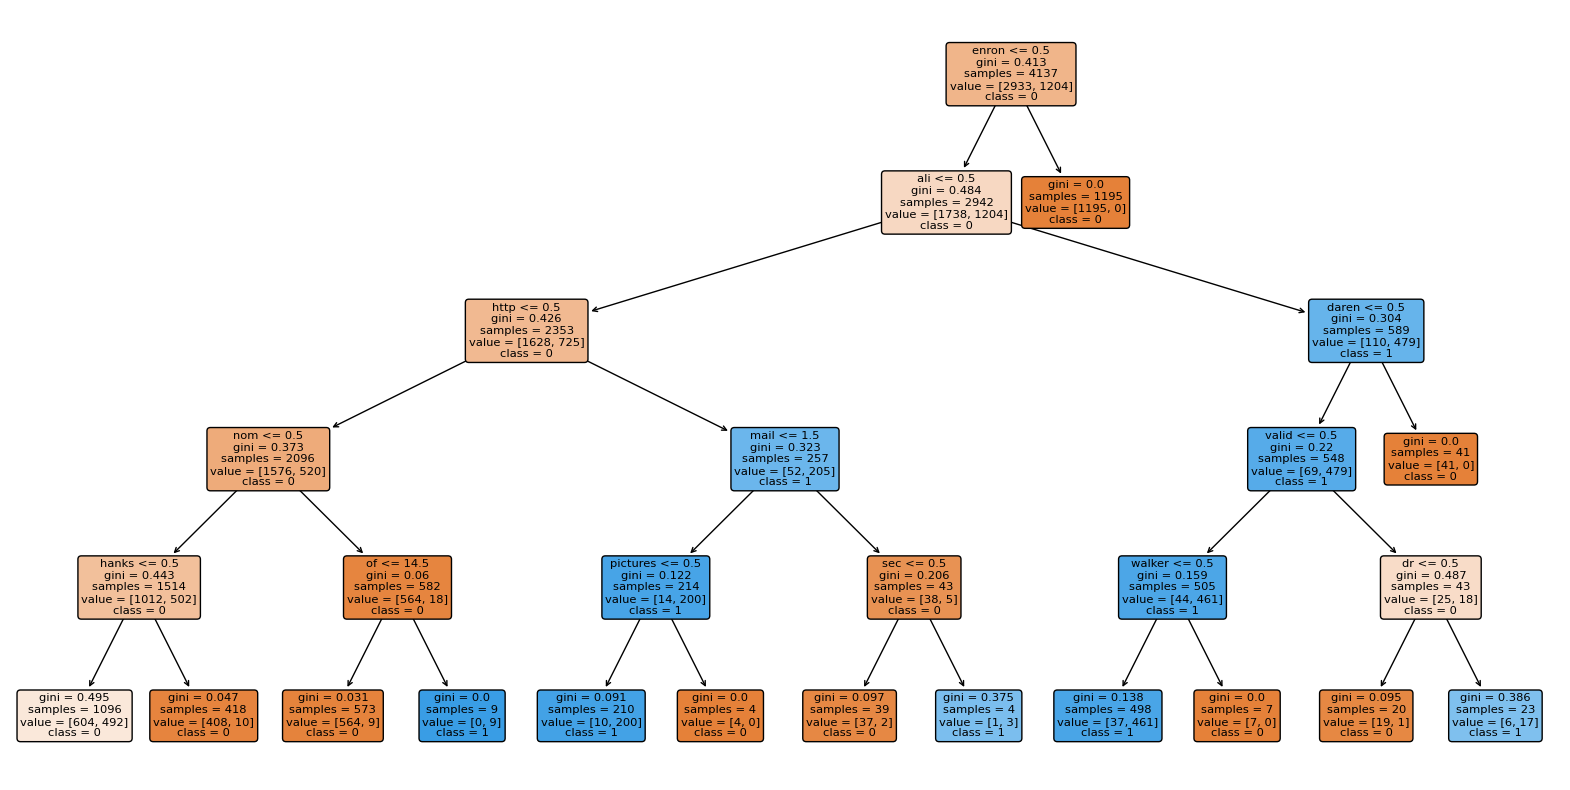

the: 0.0000
to: 0.0000
ect: 0.0000
and: 0.0000
for: 0.0000
of: 0.0168
a: 0.0000
you: 0.0000
hou: 0.0000
in: 0.0000
on: 0.0000
is: 0.0000
this: 0.0000
enron: 0.2780
i: 0.0000
be: 0.0000
that: 0.0000
will: 0.0000
have: 0.0000
with: 0.0000
your: 0.0000
at: 0.0000
we: 0.0000
s: 0.0000
are: 0.0000
it: 0.0000
by: 0.0000
com: 0.0000
as: 0.0000
from: 0.0000
gas: 0.0000
or: 0.0000
not: 0.0000
me: 0.0000
deal: 0.0000
if: 0.0000
meter: 0.0000
hpl: 0.0000
please: 0.0000
re: 0.0000
e: 0.0000
any: 0.0000
our: 0.0000
corp: 0.0000
can: 0.0000
d: 0.0000
all: 0.0000
has: 0.0000
was: 0.0000
know: 0.0000
need: 0.0000
an: 0.0000
forwarded: 0.0000
new: 0.0000
t: 0.0000
may: 0.0000
up: 0.0000
j: 0.0000
mmbtu: 0.0000
should: 0.0000
do: 0.0000
am: 0.0000
get: 0.0000
out: 0.0000
see: 0.0000
no: 0.0000
there: 0.0000
price: 0.0000
daren: 0.0569
but: 0.0000
been: 0.0000
company: 0.0000
l: 0.0000
these: 0.0000
let: 0.0000
so: 0.0000
would: 0.0000
m: 0.0000
into: 0.0000
xls: 0.0000
farmer: 0.0000
attached: 0.0000
us

In [29]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=list(map(str, label_encoder.classes_)), filled=True, rounded=True)
plt.savefig('email_spam_detection_tree.png', dpi=300, bbox_inches='tight')
plt.show()

# Print feature importances
importances = clf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")